##피라미드 옵션(Pyramid Option)
피라미드 옵션(Pyramid Option)은 여러 기초 자산의 가격이 특정 조건을 만족할 때에만 유효한 옵션입니다. 이 옵션은 여러 레벨의 행사가격을 가지고 있으며, 각각의 레벨을 초과할 때마다 추가적인 페이오프를 얻는 구조입니다. 주로 주식의 가격이 일정한 단계마다 상승할 때 추가적인 이익을 얻을 수 있는 구조로 설계됩니다.

[*********************100%%**********************]  10 of 10 completed


Pyramid Call Option Price: 3.52
Selected Tickers: ['NVDA', 'PG', 'PEP', 'ABT', 'INTC', 'ADBE', 'NKE', 'MCD', 'DIS', 'JNJ']
Strikes: [161.56415171623232, 176.25180187225342, 190.93945202827453, 205.62710218429564, 220.31475234031677]


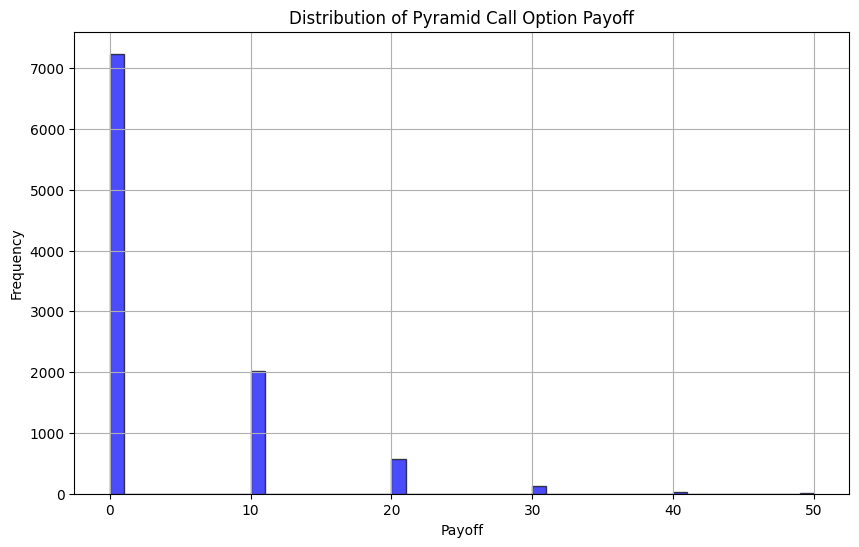

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격 (배열)
    r: 무위험 이자율
    sigma: 변동성 (배열)
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M x len(S0))
    """
    dt = T / M
    paths = np.zeros((I, M + 1, len(S0)))
    paths[:, 0, :] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal((I, len(S0)))
        for i in range(len(S0)):
            paths[:, t, i] = paths[:, t - 1, i] * np.exp((r - 0.5 * sigma[i] ** 2) * dt + sigma[i] * np.sqrt(dt) * z[:, i])
    return paths

def pyramid_option_payoff(paths, strikes, weights, payoff_increment):
    """
    피라미드 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M x len(S0))
    strikes: 행사가격 배열
    weights: 각 자산의 가중치
    payoff_increment: 각 레벨별 페이오프 증가값

    Returns:
    피라미드 옵션의 페이오프 배열
    """
    final_prices = np.sum(paths[:, -1, :] * weights, axis=1)
    payoffs = np.zeros_like(final_prices)

    for i, strike in enumerate(strikes):
        payoffs += np.where(final_prices > strike, payoff_increment, 0)

    return payoffs

# 주식 티커 목록에서 무작위로 10개 선택
all_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA', 'FB', 'BRK-B', 'JNJ', 'JPM', 'V', 'PG', 'NVDA', 'DIS', 'NFLX', 'PFE', 'ADBE', 'PYPL', 'CMCSA', 'INTC', 'T', 'VZ', 'KO', 'PEP', 'CSCO', 'MRK', 'ABT', 'MCD', 'NKE', 'ORCL', 'CRM']
random_tickers = random.sample(all_tickers, 10)

# yfinance를 사용하여 데이터 다운로드
data = yf.download(random_tickers, start="2023-01-01", end="2023-12-31")['Close']
closing_prices = data.values

# 10개의 주식의 초기 가격, 변동성 계산
S0 = closing_prices[0]
sigma = np.std(np.diff(np.log(closing_prices), axis=0), axis=0) * np.sqrt(252)

# 피라미드 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
strikes = [np.mean(S0) * (1 + 0.1 * i) for i in range(1, 6)]  # 여러 행사가격 설정
weights = np.ones(len(S0)) / len(S0)  # 균등 가중치
payoff_increment = 10  # 각 레벨별 페이오프 증가값

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 피라미드 옵션 페이오프 계산
pyramid_call_payoffs = pyramid_option_payoff(paths, strikes, weights, payoff_increment)

# 피라미드 옵션 가격 계산 (할인된 페이오프 평균)
pyramid_call_price = np.exp(-r * T) * np.mean(pyramid_call_payoffs)
print(f"Pyramid Call Option Price: {pyramid_call_price:.2f}")

# 선택된 주식 티커 및 행사가격 출력
print("Selected Tickers:", random_tickers)
print("Strikes:", strikes)

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(pyramid_call_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Pyramid Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
